# Assignment overview <ignore>
The overarching goal of this assignment is to produce a research report in which you implement, analyse, and discuss various Neural Network techniques. You will be guided through the process of producing this report, which will provide you with experience in report writing that will be useful in any research project you might be involved in later in life.

All of your report, including code and Markdown/text, ***must*** be written up in ***this*** notebook. This is not typical for research, but is solely for the purpose of this assignment. Please make sure you change the title of this file so that XXXXXX is replaced by your candidate number. You can use code cells to write code to implement, train, test, and analyse your NNs, as well as to generate figures to plot data and the results of your experiments. You can use Markdown/text cells to describe and discuss the modelling choices you make, the methods you use, and the experiments you conduct. So that we can mark your reports with greater consistency, please ***do not***:

* rearrange the sequence of cells in this notebook.
* delete any cells, including the ones explaining what you need to do.

If you want to add more code cells, for example to help organise the figures you want to show, then please add them directly after the code cells that have already been provided. 

Please provide verbose comments throughout your code so that it is easy for us to interpret what you are attempting to achieve with your code. Long comments are useful at the beginning of a block of code. Short comments, e.g. to explain the purpose of a new variable, or one of several steps in some analyses, are useful on every few lines of code, if not on every line. Please do not use the code cells for writing extensive sentences/paragraphs that should instead be in the Markdown/text cells.

# Abstract/Introduction (instructions) - 15 MARKS <ignore>
Use the next Markdown/text cell to write a short introduction to your report. This should include:
* a brief description of the topic (image classification) and of the dataset being used (CIFAR10 dataset). (2 MARKS)
* a brief description of how the CIFAR10 dataset has aided the development of neural network techniques, with examples. (3 MARKS)
* a descriptive overview of what the goal of your report is, including what you investigated. (5 MARKS)
* a summary of your major findings. (3 MARKS)
* two or more relevant references. (2 MARKS)

*Enter your abstract/introduction here*


The CIFAR-10 Dataset consists of 60,000 colour images of size 32x32 with 3 standard RGB colour channels.  
The dataset is evenly split over 10 classes, resulting in 60,000
The dataset is equally split between 10 classes, evenly split  6,000 images per class.

CIFAR-10 is typically used as a benchmarking tool over several 


CIFAR-10 is a commonly used dataset with part of a , alongside MNIST

### Objectives
of maximising on 

In this report, We
  

# Methodology (instructions) - 55 MARKS <ignore>
Use the next cells in this Methodology section to describe and demonstrate the details of what you did, in practice, for your research. Cite at least two academic papers that support your model choices. The overarching prinicple of writing the Methodology is to ***provide sufficient details for someone to replicate your model and to reproduce your results, without having to resort to your code***. You must include at least these components in the Methodology:
* Data - Decribe the dataset, including how it is divided into training, validation, and test sets. Describe any pre-processing you perform on the data, and explain any advantages or disadvantages to your choice of pre-processing. 
* Architecture - Describe the architecture of your model, including all relevant hyperparameters. The architecture must include 3 convolutional layers followed by two fully connected layers. Include a figure with labels to illustrate the architecture.
* Loss function - Describe the loss function(s) you are using, and explain any advantages or disadvantages there are with respect to the classification task.
* Optimiser - Describe the optimiser(s) you are using, including its hyperparameters, and explain any advantages or disadvantages there are to using that optimser.
* Experiments - Describe how you conducted each experiment, including any changes made to the baseline model that has already been described in the other Methodology sections. Explain the methods used for training the model and for assessing its performance on validation/test data.


## Data (7 MARKS) <ignore>

The CIFAR-10 dataset comes pre-split into a training set and testing set of legnths 50,000 and 10,000 respectively. This split is maintained, with the training set being further split into training and validation subsets, the ratio of which will vary on a per-experiment basis.

A single preprocessing step is applied to this data to normalise of the values of each image's pixels, ensuring any created models are not sensitive to the scale of the input features.

Downscaling the dataset's resolution was considered to reduce the number of required trainable parameters and therefore training times, but the findings of Sinha et al.'s 2017 paper shown that retaining CIFAR-10's resolution of 32x32 consistently led to higher model accuracy (conducted over severla CNNs with various hidden layer sizes). Greyscaling the dataset was also considered as a method of size reduction, but was ultimately not chosen due to the  


## Architecture (17 MARKS) <ignore>

## Baseline Model
To begin, A baseline CNN is created. All experiments within this investigation will use or build upon this model.

This baseline model's architecture consists of 3 convolutional layers followed by two fully connected layers. (depth,width,height)

- Convolution layer 1; with 16 3x3 feature kernels, no padding, and stride 1.  
- Pooling layer 1; with a 2x2 max-poling kernel with stride 2.
- Convolution layer 2; with 32 3x3 feature kernels, 1 pixel padding, and stride 2
- Pooling layer 2; with a 2x2 max-pooling kernel with stride 2.
- Convolution layer 3; with 48 3x3 feature kernels, 1 pixel padding, and stride 1
- Pooling layer 3; with a 2x2 max-pooling kernel with stride 2.
- Fully-Connected Layer 1; with input size 432
- Fully-Connected Layer 2; with input size 160
- Fully-Connected Layer 3; with input size 10  





An illustration of this model is provided in Figure 1.

A softmax function is not applied to the final layer, as the loss function used (CrossEntropy) handles value checking itself. 

<figure><center><img src="figures/baseline-cnn-architecture.png" width=1200><figcaption> Figure 1: A visualisation of the baseline CNN's architecture.</figcaption></center></figure>

## Loss function (3 MARKS) <ignore>

Cross entropy loss is used throughout this investigation as a loss function. 




$$ \text{Accuracy} = \frac{top1correct}{total_} $$




## Optimser (4 MARKS) <ignore>

SGD(M) 

## Experiments <ignore>
### Experiment 1 (8 MARKS)

*Describe how you went about conducting experiment 1 here*


Each experiment is set up over 25 epochs to ensure  

### Experiment 2 (8 MARKS) <ignore>

*Describe how you went about conducting experiment 2 here*

### Experiment 3 (8 MARKS) <ignore>

*Describe how you went about conducting experiment 3 here*

In [27]:
############################################
### Code for building the baseline model ###
############################################

###
# Checking if GPU is available.
###

import torch


device = ("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {device}")



Using device: cuda


In [28]:
###
# Load and Normalise Dataset into batches
###
import torchvision.transforms as transforms
import torchvision.datasets as datasets


# Normalisation dict fn thing, taken from Lab 6's code to normalise CIFAR-10 dataset to mean 0, SD 1.
transform = {
    'train':transforms.Compose([
        transforms.Resize(32),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(32),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


# Batch size to use in dataloaders
BATCH_SIZE = 32


# Fetch training dataset and normalise it.
full_train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform['train'])

# Don't create train loader here as dataset needs to be split in differnet ways for later experiemnts
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)



# Create Testing Dataset
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform['test'])
# Create Testing dataloader
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)




# fetch a batch of images and labels for testing (not the NN kind, the mess about to see if things are working kind)
print("Fetching one sample batch from test data.")
dataiter = iter(test_loader)
sample_images, sample_labels = next(dataiter)




# Define Classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# Create class to ID mapping
id2classes = {idx:clss for idx, clss in enumerate(classes)}

# Create ID to class mapping
classes2id = {clss:idx for idx,clss in id2classes.items()}


Files already downloaded and verified
Files already downloaded and verified
Fetching one sample batch from test data.


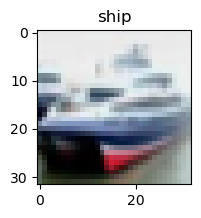

In [29]:
###
# Handy functions for later
###
import numpy as np
import matplotlib.pyplot as plt



def imshow(inp, title=None):
    """
    Shows an image from a Tensor representation.
    Taken from Lab 6 work
    """
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(2, 2))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated



imshow(sample_images[1], id2classes[int(sample_labels[1])])

In [30]:
###
# Create the Baseline Network itsself.
###

import torch.nn as nn
import torch.nn.functional as F

class BaselineNetwork(nn.Module):
    """
    Class for a baseline CNN Network with randomly initialised weights.
    """

    def __init__(self):
        """
            Creates the network with already randomised weights.
        """
        super().__init__()
        # Create first cnn layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=0) 
        # Create second cnn layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Create third cnn layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=48, kernel_size=3, stride=1, padding=1)

        # Create pooling layer used throughout
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # Pooling layer to downsample representations.

        # Create first linear layer
        self.fc1 = nn.Linear(in_features=48*3*3, out_features=160)
        # Create second linear layer
        self.fc2 = nn.Linear(in_features=160, out_features=10)


    def forward(self, x):
        """
            Performs a forward pass of a batch / instance
        """
        # ---- Convolution Layers ----
        # First CNN layer
        x = self.pool(F.relu(self.conv1(x)))
        # Second CNN layer
        x = self.pool(F.relu(self.conv2(x))) 
        # Third CNN layer
        x = self.pool(F.relu(self.conv3(x)))

        # ---- Linear Layers ----
        # Flatten to use in Linear Layers
        x = x.view(-1, 48*3*3)
        # First Linear Layer
        x = F.relu(self.fc1(x))
        # Second Linear Layer. Doesn't use an activation
        x = self.fc2(x)
        # No softmax function is used here as loss fn handles it.
        
        # Return results
        return x

    



In [31]:
##
# Code Testing CNN's layer sizes are correct, mainly just to validate the model is actually built correctly.
##

test_net = BaselineNetwork()

print(f"Batch size: {len(sample_images)}")

x0 = sample_images
print(f"x0 shape is: {x0.shape}")

x1 = F.relu(test_net.conv1(x0))
print(f"x1 shape is: {x1.shape}")

x2 = test_net.pool(x1)
print(f"x2 shape is: {x2.shape}")

x3 = F.relu(test_net.conv2(x2))
print(f"x3 shape is: {x3.shape}")

x4 = test_net.pool(x3)
print(f"x4 shape is: {x4.shape}")

x5 = F.relu(test_net.conv3(x4))
print(f"x5 shape is: {x5.shape}")

x6 = test_net.pool(x5)
print(f"x6 shape is: {x6.shape}")

x7 = x6.view(-1, 48*3*3)
print(f"x7 shape is: {x7.shape}")

x8 = F.relu(test_net.fc1(x7))
print(f"x8 shape is: {x8.shape}")

x9 = F.relu(test_net.fc2(x8))
print(f"x9 shape is: {x9.shape}")

pred_logits = test_net.forward(sample_images)
assert list(pred_logits.shape) == [32, 10], "Network does not output expected logits."

del [test_net, pred_logits, x0, x1, x2, x3, x4, x5, x6, x7, x8, x9]

Batch size: 32
x0 shape is: torch.Size([32, 3, 32, 32])
x1 shape is: torch.Size([32, 16, 30, 30])
x2 shape is: torch.Size([32, 16, 15, 15])
x3 shape is: torch.Size([32, 32, 15, 15])
x4 shape is: torch.Size([32, 32, 7, 7])
x5 shape is: torch.Size([32, 48, 7, 7])
x6 shape is: torch.Size([32, 48, 3, 3])
x7 shape is: torch.Size([32, 432])
x8 shape is: torch.Size([32, 160])
x9 shape is: torch.Size([32, 10])


# Results (instructions) - 55 MARKS <ignore>
Use the Results section to summarise your findings from the experiments. For each experiment, use the Markdown/text cell to describe and explain your results, and use the code cell (and additional code cells if necessary) to conduct the experiment and produce figures to show your results.

### Experiment 1 (17 MARKS) <ignore>

#### Experiment Setup
For experiment 1, I set an experiment over 

In [36]:
#############################
### Code for Experiment 1 ###
#############################

import random 
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch.optim as optim

###
# Functions used for Experiment 1's loss search. 
###



# Splitting training data into subsets of training and validation subsets using 80:20 ratio.
def exp1_create_train_val_split(seed):
    """
    Creates a train/validation split of 80:20 for experiment 1. 
    Split is randomised based on a provided seed.

    Arguments:
        seed: the seed to use for the splitter
    
    Returns:
        Tuple of training dataloader and validation dataloader
    """
    
    # Create generator from provided seed
    generator = torch.Generator().manual_seed(seed)
    
    # Split larger training dataset into a training subset and validation subset.
    train_subset, val_subset = torch.utils.data.random_split(full_train_set, [0.8, 0.2], generator)
    
    # Create dataloader for the training subset
    train_sub_loader = torch.utils.data.DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    # Create dataloader for validation subset.
    val_sub_loader = torch.utils.data.DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    
    # return the two
    return train_sub_loader, val_sub_loader



def exp1_train(model, train_dataloader, loss_fn, optimizer, device):
    """Train Experiment 1's model on a single pass through the dataloader.

    Args:
        model: The model to perform the epoch on
        train_dataloader: The dataloader to use.
        loss_fn: The loss Criterion to use.
        optimizer: the optimizer to use, this is set up with the experiment's learning rate.
        device: The device to train on.
    
    Returns:
        model: The updated model.
        all_train_true_labels: the true training labels from all batches for this epoch.
        all_train_predicted_labels: the predicted training labels from all batches for this epoch.
        average_batch_loss: the average training loss over all of the batches for this epoch. 
        

    """
    
    # Put model into training mode
    model.train()

    # Create loss tracking variable
    running_loss = 0

    # Create prediction tracking lists
    all_train_predicted_labels = []
    all_train_true_labels = []


    # For each batch in the dataloader...
    for _, data in enumerate(train_dataloader,0):
        
        # Get model inputs, data is a list of [inputs, labels]
        inputs, labels = data
        
        # Accumulate true labels from this batch into all true labels list
        all_train_true_labels.extend(labels.tolist())

        # transfer input and labels over to device.
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients.
        optimizer.zero_grad()

        # Perform a forward pass.
        outputs = model(inputs)

        # Get predicted labels for each item in batch
        _, batch_train_predicted_labels = torch.max(outputs, 1)
        # Accumulate predicted labels from this batch into all predictions list
        all_train_predicted_labels.extend(batch_train_predicted_labels.tolist())
        

        
        # Get this batches loss
        loss = loss_fn(outputs, labels)
        # Calculate updated gradients
        loss.backward()
        # Perform network Optimisation
        optimizer.step()

        # get Loss statistics and update running total
        current_loss = loss.item()
        running_loss += current_loss

    # calculate the average batch loss over this epoch.
    average_batch_loss = running_loss / len(train_dataloader)

    return model, all_train_true_labels, all_train_predicted_labels, average_batch_loss



def exp1_evaluate(model, val_dataloader, loss_fn, device):
    """
    Evaluate Experiment 1's model through one pass of the dataloader.

    Args:
        model: The model to evaluate
        val_dataloader: The dataloader to evaluate the model on
        loss_fn: The loss function to use
        device: The device to perform the evaluation on.

    Returns:
        model: The model after evaluation
        all_val_true_labels: All of the true labels from the batches in this epoch.
        all_val_predicted_labels: All of the predicted labels from the batches in this epoch.
        average_batch_loss: The average validation loss over all of the batches in the epoch.
    """

    # Put model into evaluation mode
    model.eval()

    # Create loss tracking variable
    running_loss = 0

    # Create prediction tracking lists
    all_val_true_labels = []
    all_val_predicted_labels = []


    # don't worry about gradients during validation  
    with torch.no_grad():

        #over all batches...
        for _, data in enumerate(val_dataloader, 0):
            
            # Get the model inputs and labels of this batch
            inputs, labels = data

            # Accumulate the true labels of this batch into the all true values list
            all_val_true_labels.extend(labels.tolist())

            # move inputs and labels over to device.
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Perform a forward pass.
            outputs = model(inputs)

            # Get predicted labels for each item in batch
            _, batch_val_predicted_labels = torch.max(outputs, 1)
            # Accumulate predicted labels from this batch into all predictions list
            all_val_predicted_labels.extend(batch_val_predicted_labels.tolist())

            #calculate this batches loss
            loss = loss_fn(outputs, labels)
            current_loss = loss.item()

            running_loss += current_loss

    # calculate the average loss over every batch.
    average_batch_loss = running_loss / len(val_dataloader)

    return model, all_val_true_labels, all_val_predicted_labels, average_batch_loss



def exp1_do_one_lr_experiment(learning_rate, index, num_epochs, train_loader, val_loader):
    """Perform one experiment for experiment 1 with a given learning rate.

    Args:
        learning_rate: The learning rate to use for this experiment.
        index: The index of this experiment.
        num_epochs: The number of epochs to train for.
        train_loader: The training dataloader to use.
        val_loader: The validation dataloader to use.

    Returns:
        train_losses: The training losses for each epoch.
        val_losses: The validation losses for each epoch.
        train_accuracies: The training accuracies for each epoch.
        val_accuracies: The validation accuracies for each epoch.
    """
    
    print(f"    Starting sub experiment {index} started.")

    # Create Model
    model = BaselineNetwork()

    # Move model onto GPU
    model.to(device)

    # Define loss function
    loss_fn = nn.CrossEntropyLoss()

    # Define Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    # momentum of 0.9 is taken from lab 6's code.
    

    # Create lists to store training and validation losses
    train_losses = []
    val_losses = []
    # Create lists to store training and validation accuracies
    train_accuracies = []
    val_accuracies = []

    # Create list to store models
    model_list = []


    # Train for X epochs
    for epoch in range(1, num_epochs+1):
        # Perform a pass over the training set.
        model, train_true_labels, train_predicted_labels, train_loss = exp1_train(model, train_loader, loss_fn, optimizer, device)
        # Calculate training accuracy
        train_acc = accuracy_score(train_true_labels, train_predicted_labels)

        # Perform a pass over the validation set.
        model, val_true_labels, val_predicted_labels, val_loss = exp1_evaluate(model, val_loader, loss_fn, device)
        
        model_list.append(model)
        # calculate validation accuracy
        val_acc = accuracy_score(val_true_labels, val_predicted_labels)

        # Add losses and accuracies to lists
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)


        # Print loss and accuracy values to see how training is going.
        print(f"        Epoch {epoch} train loss: {train_loss}, val loss: {val_loss}, train acc: {train_acc}, val acc: {val_acc}")

        
    print(f"    Sub experiment {index} completed.")
    # Return the losses and accuracies for this experiment
    return train_losses, val_losses, train_accuracies, val_accuracies, model_list





In [41]:
###
# Main Experiment Loop to train, validate and collect data for the 25 models.
###

import pickle

# Check if the results file already exists, if it does, warn and exit
try:
    with open("exp1/results/exp1_results.pkl", "rb") as f:
        print("Results file already exists. Exiting...")
        raise IOError("Results file already exists.")
except FileNotFoundError:
    None


# create training and validation dataloaders.
train_loader, val_loader = exp1_create_train_val_split(seed=246518)

# define learning rates to test
learning_rates = [1e-2, 5e-3, 1e-3, 5e-4 ,1e-4] # inspired from https://arxiv.org/pdf/1902.09843 | 1e-1 was experimented with but was found to be unstable.
number_of_experiment_runs = 5
epochs = 40

# Create dictionary to store all statistics for each learning rate.
all_statistics = {}
# Create dictionary to store the best performing model out of the 5 runs for each learning rate. This includes early stopping!
best_models = {}

# iterate over each learning rate.
for lr in tqdm(learning_rates, desc="Progress through learning rates"):
    print()
    print(f"Starting new averaging loop for learning rate: {lr}...")
    
    # Create dictionary to store all of the statistics for this learning rate with the format { <lr> : {<metric> : {<test_idx>: [epoch1value, epoch2value]} } }
    all_statistics[lr] = {
                        'train_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                        'val_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                        'train_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}, 
                        'val_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}
                        }
    
    

    # create a list to store the best performing models for validation loss for each sub experiment.
    this_subexp_best_models = []

    # iterate over 5 models with different initial weights.
    for test_idx in range(1, number_of_experiment_runs+1):
        
        # train and evaluate one model of the experiment
        train_loss_list, val_loss_list, train_acc_list, val_acc_list, model_list = exp1_do_one_lr_experiment(lr, test_idx, epochs, train_loader, val_loader)
        
        # store the experiment's results lists for this learning rate and test index.
        all_statistics[lr]['train_loss'][test_idx].append(train_loss_list)
        all_statistics[lr]['val_loss'][test_idx].append(val_loss_list)
        all_statistics[lr]['train_acc'][test_idx].append(train_acc_list)
        all_statistics[lr]['val_acc'][test_idx].append(val_acc_list)


        # Get the model with the lowest validation loss for this run and store it.
        best_model_epoch_idx = val_loss_list.index(min(val_loss_list))
        best_model = model_list[best_model_epoch_idx]
        this_subexp_best_models.append((best_model, f"Best model from sub experiment, {test_idx}, epoch {best_model_epoch_idx+1} "))
    
    # Get the best performing model from the 5 runs and store it in the all_models dictionary.
    best_models[lr] = model_list 
    #  ^^^ Turns out i made a mistake here, this should be this_subexp_best_models, not model_list. this_subexp_best_models is the list of best models from each sub experiment, 
    # model_list is the list of all models from each sub experiment. This makes best_models 5x bigger than it should be without indexes or epochs to differentiate the models.  
    # I should re-run this but i'm not going to because it's already taken 5 hours to run this and I don't fancy waiting another 5 hours for it to run again... 
    
    print(f"Completed all experiments for learning rate {lr}.")
    
        

# save results to file
with open("exp1/results/exp1_results.pkl", "wb") as f:
    pickle.dump(all_statistics, f)
    print("Results saved to file")

# Save models to file
with open("exp1/models/exp1_models.pkl", "wb") as f:
    pickle.dump(best_models, f)
    print("Models saved to file")


Progress through learning rates:   0%|          | 0/5 [00:00<?, ?it/s]


Starting new averaging loop for learning rate: 0.01...
    Starting sub experiment 1 started.
        Epoch 1 train loss: 1.5992664309501647, val loss: 1.3045137612202677, train acc: 0.4164, val acc: 0.5307
        Epoch 2 train loss: 1.1649765041351319, val loss: 1.1938108799937435, train acc: 0.586225, val acc: 0.5898
        Epoch 3 train loss: 1.0128870920181274, val loss: 0.9760081117716841, train acc: 0.644125, val acc: 0.6591
        Epoch 4 train loss: 0.9285467993974685, val loss: 0.9463123060263003, train acc: 0.677, val acc: 0.6692
        Epoch 5 train loss: 0.868195174741745, val loss: 0.9000846488407245, train acc: 0.697775, val acc: 0.6886
        Epoch 6 train loss: 0.8193069252490998, val loss: 0.9101356147958067, train acc: 0.715725, val acc: 0.7015
        Epoch 7 train loss: 0.7864585769295692, val loss: 0.8942285814224341, train acc: 0.728625, val acc: 0.6975
        Epoch 8 train loss: 0.7627598438501358, val loss: 0.8516197673048074, train acc: 0.736975, val acc

Progress through learning rates:  20%|██        | 1/5 [59:05<3:56:20, 3545.05s/it]

        Epoch 40 train loss: 0.6200277618408203, val loss: 1.0487773107073177, train acc: 0.79565, val acc: 0.7014
    Sub experiment 5 completed.
Completed all experiments for learning rate 0.01.

Starting new averaging loop for learning rate: 0.005...
    Starting sub experiment 1 started.
        Epoch 1 train loss: 1.6985616307258606, val loss: 1.3855032589488898, train acc: 0.38145, val acc: 0.4954
        Epoch 2 train loss: 1.2551901267051697, val loss: 1.1337144321526964, train acc: 0.550875, val acc: 0.596
        Epoch 3 train loss: 1.0662055346012116, val loss: 1.0546385970549843, train acc: 0.6241, val acc: 0.6337
        Epoch 4 train loss: 0.9524640949010849, val loss: 0.945181500226164, train acc: 0.66665, val acc: 0.6643
        Epoch 5 train loss: 0.8656682316064834, val loss: 0.8694084668502259, train acc: 0.697675, val acc: 0.6983
        Epoch 6 train loss: 0.7985064591646195, val loss: 0.8883320423551261, train acc: 0.72275, val acc: 0.6873
        Epoch 7 train lo

Progress through learning rates:  40%|████      | 2/5 [1:59:10<2:59:02, 3580.71s/it]

        Epoch 40 train loss: 0.3690739125072956, val loss: 1.1568111423581553, train acc: 0.86975, val acc: 0.7176
    Sub experiment 5 completed.
Completed all experiments for learning rate 0.005.

Starting new averaging loop for learning rate: 0.001...
    Starting sub experiment 1 started.
        Epoch 1 train loss: 2.1072569801330565, val loss: 1.8636321408299212, train acc: 0.23015, val acc: 0.3315
        Epoch 2 train loss: 1.6903995175361632, val loss: 1.6118913150062195, train acc: 0.385925, val acc: 0.4162
        Epoch 3 train loss: 1.4832130907058716, val loss: 1.4346967219544675, train acc: 0.463, val acc: 0.4795
        Epoch 4 train loss: 1.3679608760833741, val loss: 1.311633836347074, train acc: 0.5074, val acc: 0.5303
        Epoch 5 train loss: 1.2736480116844178, val loss: 1.2244615674780581, train acc: 0.543675, val acc: 0.5626
        Epoch 6 train loss: 1.189632709646225, val loss: 1.139821180329917, train acc: 0.5776, val acc: 0.5972
        Epoch 7 train loss:

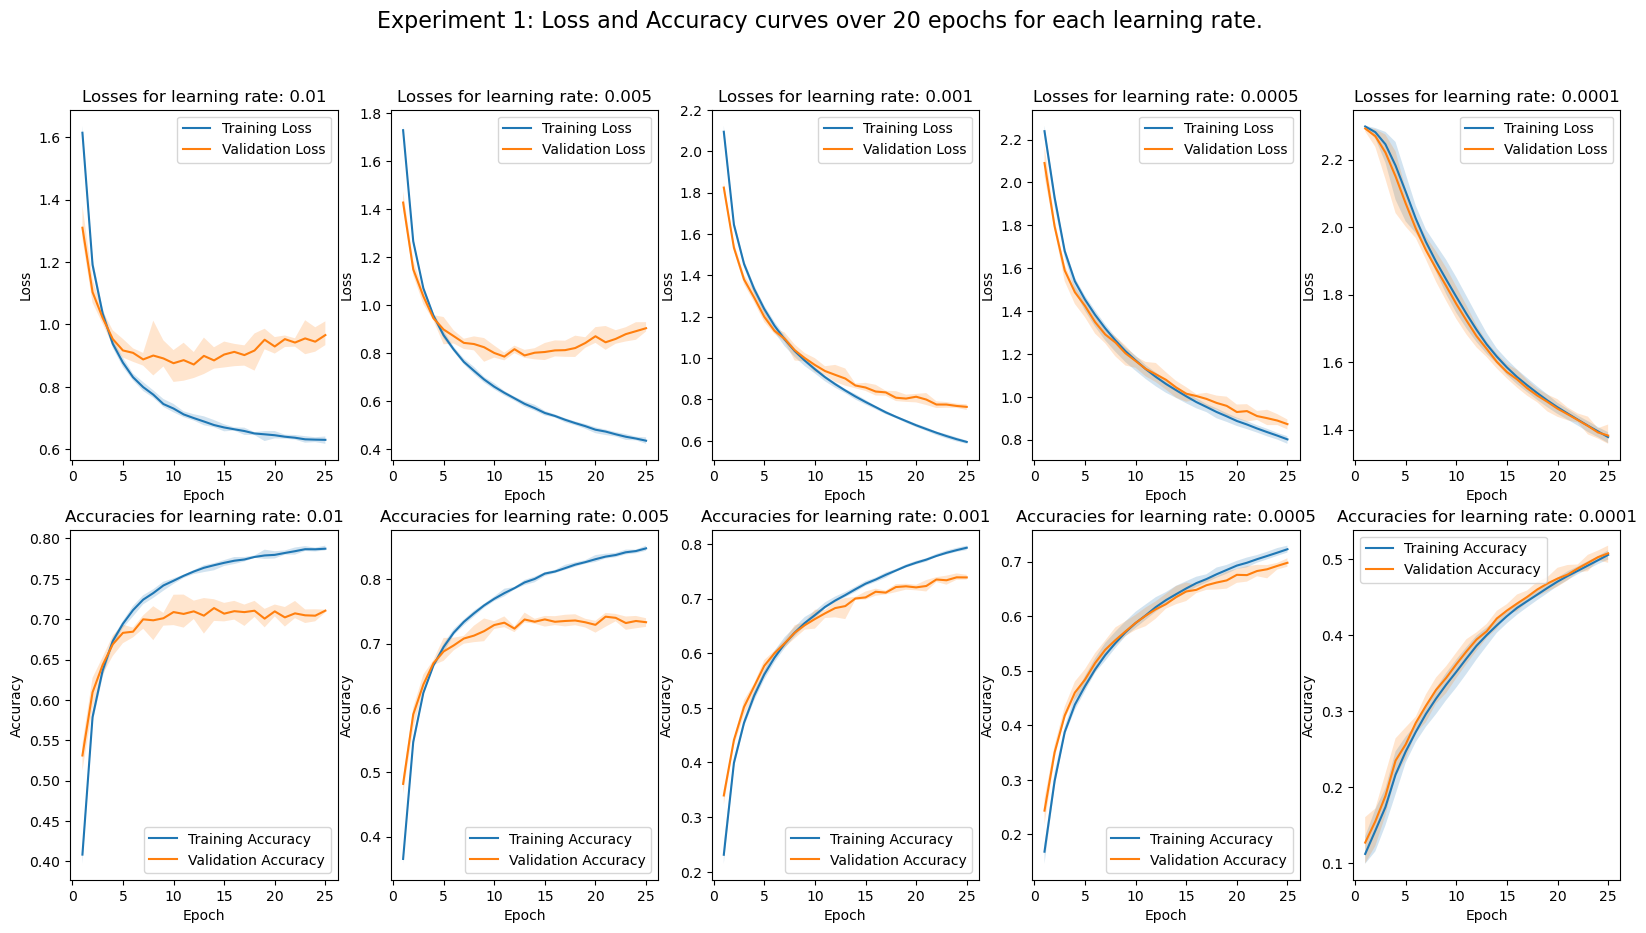

In [40]:
###
# Results for the first part of the experiment, running 5 models for each learning rate.
###

# Load results fom file
with open("exp1/results/exp1_results.pkl", "rb") as file:
    all_statistics = pickle.load(file)



# Create Super Figure for all learning rates
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

fig.suptitle(f"Experiment 1: Loss and Accuracy curves over {epochs} epochs for each learning rate.", fontsize=16)

# For each learning rate...
for i, learning_rate in enumerate(learning_rates):
    # -- This loop will display 2 graphs side by side, one for loss and one for accuracy over the 5 experiments, averaged. --
    
    # get the results for this learning rate
    lr_results = all_statistics[learning_rate]

    # create overall lists to store values for this learning rate.
    val_loss_values = []
    train_loss_values = []
    val_acc_values = []
    train_acc_values = []

    # iterate over each test index, adding values to overall lists.
    for idx in range(1, number_of_experiment_runs+1):
        val_loss_values.append(lr_results['val_loss'][idx])
        train_loss_values.append(lr_results['train_loss'][idx])
        val_acc_values.append(lr_results['val_acc'][idx])
        train_acc_values.append(lr_results['train_acc'][idx])


    # Calculate the average values for each metric over sub experiments.
    average_train_losses = np.mean(train_loss_values, axis=0)[0]
    average_val_losses = np.mean(val_loss_values, axis=0)[0]
    average_train_accs = np.mean(train_acc_values, axis=0)[0]
    average_val_accs = np.mean(val_acc_values, axis=0)[0]

    # Get the largest values for each metric over all sub experiments.
    max_train_losses = np.max(train_loss_values, axis=0)[0]
    max_val_losses = np.max(val_loss_values, axis=0)[0]
    max_train_accs = np.max(train_acc_values, axis=0)[0]
    max_val_accs = np.max(val_acc_values, axis=0)[0]

    # Get the smallest values for each metric over all sub experiments.
    min_train_losses = np.min(train_loss_values, axis=0)[0]
    min_val_losses = np.min(val_loss_values, axis=0)[0]
    min_train_accs = np.min(train_acc_values, axis=0)[0]
    min_val_accs = np.min(val_acc_values, axis=0)[0]


    # create epoch range for x axis
    epoch_range = list(range(1, epochs+1))


    # plot training and validation loss graphs
    axs[0, i].plot(epoch_range, average_train_losses, label="Training Loss") # plot average training loss
    axs[0, i].plot(epoch_range, average_val_losses, label="Validation Loss") # plot average validation loss
    axs[0, i].fill_between(epoch_range, min_train_losses, max_train_losses, alpha=0.2) # add fill between min and max train values
    axs[0, i].fill_between(epoch_range, min_val_losses, max_val_losses, alpha=0.2) # add fill between min and max val values
    axs[0, i].set_title(f"Losses for lr: {learning_rate}") # add title
    axs[0, i].set_xlabel("Epoch") # set x label to epoch
    axs[0, i].set_ylabel("Loss") # set y label to loss
    axs[0, i].legend() # turn on legend
    axs[0, i].grid() # turn on grid
    axs[0, i].set_ylim(0, 2.3) # set y limit to 2.3


    # plot training and validation accuracy graphs
    axs[1, i].plot(epoch_range, average_train_accs, label="Training Accuracy") # plot average training accuracy
    axs[1, i].plot(epoch_range, average_val_accs, label="Validation Accuracy") # plot average validation accuracy
    axs[1, i].fill_between(epoch_range, min_train_accs, max_train_accs, alpha=0.2) # add fill between min and max train values
    axs[1, i].fill_between(epoch_range, min_val_accs, max_val_accs, alpha=0.2) # add fill between min and max val values 
    axs[1, i].set_title(f"Accuracies for lr: {learning_rate}") # add title
    axs[1, i].set_xlabel("Epoch") # set x label to epoch
    axs[1, i].set_ylabel("Accuracy") # set y label to accuracy
    axs[1, i].legend() # turn on legend
    axs[1, i].grid() # turn on grid
    axs[1, i].set_ylim(0, 1) # set y limit to 1

# Show the super figure
plt.show()


In [ ]:
#########################
### LR Scheduler Part ###
#########################

###
# Create new training function for the LR scheduler part of the experiment.
# Also create a class to hold the learning rate scheduler.
###

import torch.optim.lr_scheduler as lr_scheduler


def lr_scheduler_lambda(epoch):
    """
        Lambda function to create a custom lr scheduler.

        Args:
            epoch: The current epoch number. 
    
        Returns:
            lr: The new learning rate to use for this epoch.
    
    """
    
    # Define switch points for learning rate changes (what epoch to change the learning rate at) 
    switch_points = [] 
    # define the learning rates to switch to after each switch point.
    lr_values = []

    # check each switch point and return the appropraite learning rate.
    for switch, lr in zip(switch_points[::-1], lr_values[::-1]):
        if epoch <= switch:
            return lr
        
    # return the last learning rate if epoch is greater than all switch points
    return lr_values[-1]  



def exp1_train_with_lr_scheduler(model, train_dataloader, optimizer, scheduler, loss_fn, device):
    """Train Experiment 1's model on a single pass through the dataloader, using an LR scheduler.

        Args:
            model: The model to perform the epoch on
            train_dataloader: The dataloader to use.
            loss_fn: The loss Criterion to use.
            optimizer: the optimizer to use, this is set up with the experiment's learning rate.
            scheduler: The learning rate scheduler to use.
            device: The device to train on.
        
        Returns:
            model: The updated model.
            all_train_true_labels: the true training labels from all batches for this epoch.
            all_train_predicted_labels: the predicted training labels from all batches for this epoch.
            average_batch_loss: the average training loss over all of the batches for this epoch. 
            
        """
    
    # Put model into training mode
    model.train()

    # Create loss tracking variable
    running_loss = 0

    # Create prediction tracking lists
    all_train_predicted_labels = []
    all_train_true_labels = []


    # For each batch in the dataloader...
    for _, data in enumerate(train_dataloader,0):
        
        # Get model inputs, data is a list of [inputs, labels]
        inputs, labels = data
        
        # Accumulate true labels from this batch into all true labels list
        all_train_true_labels.extend(labels.tolist())

        # transfer input and labels over to device.
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients.
        optimizer.zero_grad()

        # Perform a forward pass.
        outputs = model(inputs)

        # Get predicted labels for each item in batch
        _, batch_train_predicted_labels = torch.max(outputs, 1)
        # Accumulate predicted labels from this batch into all predictions list
        all_train_predicted_labels.extend(batch_train_predicted_labels.tolist())
        

        
        # Get this batches loss
        loss = loss_fn(outputs, labels)
        # Calculate updated gradients
        loss.backward()
        # Perform network Optimisation
        optimizer.step()
        # Perform learning rate scheduler step 
        scheduler.step()


        # get Loss statistics and update running total
        current_loss = loss.item()
        running_loss += current_loss

    # calculate the average batch loss over this epoch.
    average_batch_loss = running_loss / len(train_dataloader)

    return model, all_train_true_labels, all_train_predicted_labels, average_batch_loss






def exp1_do_one_experiment_with_scheduler( index, num_epochs, train_loader, val_loader):
    """Perform one experiment for experiment 1 with a custom learning rate scheduler.

    Args:
        index: The index of this experiment.
        num_epochs: The number of epochs to train for.
        train_loader: The training dataloader to use.
        val_loader: The validation dataloader to use.

    Returns:
        train_losses: The training losses for each epoch.
        val_losses: The validation losses for each epoch.
        train_accuracies: The training accuracies for each epoch.
        val_accuracies: The validation accuracies for each epoch.
    """
    
    print(f"    Starting sub experiment {index} started.")

    # Create Model
    model = BaselineNetwork()

    # Move model onto GPU
    model.to(device)

    # Define loss function
    loss_fn = nn.CrossEntropyLoss()

    # Define Optimizer, momentum of 0.9 is taken from lab 6's code.
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    
    # Create learning rate scheduler object using custom lambda function.
    scheduler = lr_scheduler.LRScheduler(optimizer, lr_scheduler_lambda)

    # Create lists to store training and validation losses
    train_losses = []
    val_losses = []
    # Create lists to store training and validation accuracies
    train_accuracies = []
    val_accuracies = []

    # Create list to store models
    model_list = []


    # Train for X epochs
    for epoch in range(1, num_epochs+1):
        # Perform a pass over the training set with the learning rate scheduler.
        model, train_true_labels, train_predicted_labels, train_loss = exp1_train_with_lr_scheduler(model, train_loader, optimizer, scheduler, loss_fn,  device)
        # Calculate training accuracy
        train_acc = accuracy_score(train_true_labels, train_predicted_labels)

        # Perform a pass over the validation set.
        model, val_true_labels, val_predicted_labels, val_loss = exp1_evaluate(model, val_loader, loss_fn, device)
        
        model_list.append(model)
        # calculate validation accuracy
        val_acc = accuracy_score(val_true_labels, val_predicted_labels)

        # Add losses and accuracies to lists
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)


        # Print loss and accuracy values to see how training is going.
        print(f"        Epoch {epoch} train loss: {train_loss}, val loss: {val_loss}, train acc: {train_acc}, val acc: {val_acc}")

        
    print(f"    Sub experiment {index} completed.")
    # Return the losses and accuracies for this experiment
    return train_losses, val_losses, train_accuracies, val_accuracies, model_list



In [ ]:
###
# Scheduler Experiment Loop
###

###
# Main Experiment Loop to train, validate and collect data for the 25 models.
###

import pickle

# Check if the results file already exists, if it does, warn and exit
try:
    with open("exp1/results/exp1_results.pkl", "rb") as f:
        print("Results file already exists. Exiting...")
        raise IOError("Results file already exists.")
except FileNotFoundError:
    None


# create training and validation dataloaders.
train_loader, val_loader = exp1_create_train_val_split(seed=246518)

# define learning rates to test

number_of_experiment_runs = 5
epochs = 25


# Create dictionary to store all statistics for each learning rate.
all_statistics = {}


# Create dictionary to store all of the statistics with the format {<metric> : { <test_idx> : [epoch1value, epoch2value] } }
scheduler_statistics = {
                    'train_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                    'val_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                    'train_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}, 
                    'val_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}
                    }


# iterate over 5 models with different initial weights.
for test_idx in range(1, number_of_experiment_runs+1):
    
    # train and evaluate one model.
    train_loss_list, val_loss_list, train_acc_list, val_acc_list, model_list = exp1_do_one_experiment_with_scheduler(test_idx, epochs, train_loader, val_loader)
    
    # store the experiment's results lists for this learning rate and test index.
    scheduler_statistics['train_loss'][test_idx].append(train_loss_list)
    scheduler_statistics['val_loss'][test_idx].append(val_loss_list)
    scheduler_statistics['train_acc'][test_idx].append(train_acc_list)
    scheduler_statistics['val_acc'][test_idx].append(val_acc_list)


    # Get the model with the lowest validation loss for this run and store it.
    scheduler_best_model_epoch_idx = val_loss_list.index(min(val_loss_list))
    scheduler_best_model = model_list[scheduler_best_model_epoch_idx]
    

# Get the best performing model from the 5 runs and store it in the all_models dictionary.

print(f"Completed all experiments for learning rate {lr}.")
    
        

# save results to file
with open("exp1/results/exp1_custom_scheduler_results.pkl", "wb") as f:
    pickle.dump(all_statistics, f)
    print("Results saved to file")

# Save models to file
with open("exp1/models/best_custom_scheduler_model.pkl", "wb") as f:
    pickle.dump(scheduler_best_model, f)
    print("Models saved to file")


### Experiment 2 (19 MARKS) <ignore>

*Write up results for Experiment 2 here*

In [2]:
#############################
### Code for Experiment 2 ###
#############################

### Experiment 3 (19 MARKS) <ignore>

*Write up results for Experiment 3 here*

In [ ]:
#############################
### Code for Experiment 3 ###
#############################

# Conclusions and Discussion (instructions) - 25 MARKS <ignore>
In this section, you are expected to:
* briefly summarise and describe the conclusions from your experiments (8 MARKS).
* discuss whether or not your results are expected, providing scientific reasons (8 MARKS).
* discuss two or more alternative/additional methods that may enhance your model, with scientific reasons (4 MARKS). 
* Reference two or more relevant academic publications that support your discussion. (4 MARKS)

*Write your Conclusions/Discussion here*

# References (instructions) <ignore>
Use the cell below to add your references. A good format to use for references is like this:

[AB Name], [CD Name], [EF Name] ([year]), [Article title], [Journal/Conference Name] [volume], [page numbers] or [article number] or [doi]

Some examples:

JEM Bennett, A Phillipides, T Nowotny (2021), Learning with reinforcement prediction errors in a model of the Drosophila mushroom body, Nat. Comms 12:2569, doi: 10.1038/s41467-021-22592-4

SO Kaba, AK Mondal, Y Zhang, Y Bengio, S Ravanbakhsh (2023), Proc. 40th Int. Conf. Machine Learning, 15546-15566

*List your references here*

T. Sinha, B. Verma and A. Haidar, "Optimization of convolutional neural network parameters for image classification," 2017 IEEE Symposium Series on Computational Intelligence (SSCI), Honolulu, HI, USA, 2017, pp. 1-7, doi: 10.1109/SSCI.2017.8285338.